In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [2]:
df = pd.read_csv("D:\\My Programming\\tox21trainingdata.sdf\\augmenteddataset.csv")

In [3]:
X = df[['MolWeight', 'NumAtoms', 'NumHeavyAtoms', 'NumRotatableBonds']]
y = df['toxicity_score']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6)

In [6]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
y_pred = xgb_model.predict(X_test)

In [8]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [9]:
print('R2 score:', r2)
print('Mean absolute error:', mae)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R2 score: 0.5661533802696663
Mean absolute error: 1.8551684468706555
Mean squared error: 8.450629267494739
Root mean squared error: 2.9069966060342654


In [10]:
#Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Create PCA object with n_components
pca = PCA(n_components=2)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_train)


In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
pca = PCA(n_components=4)
linear_reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('linear_reg', linear_reg)])
pipeline.fit(X_train, y_train)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
y_pred = pipeline.predict(X_test)
r2_score = r2_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error)
print("R2 score: {}".format(r2_score))
print("Mean absolute error: {}".format(mean_absolute_error))
print("Mean squared error: {}".format(mean_squared_error))
print("Root mean squared error: {}".format(root_mean_squared_error))



Cross-validation scores: [0.03275372 0.07718068 0.08080749 0.09172425 0.05339092]
Average cross-validation score: 0.07
R2 score: 0.05314584920909693
Mean absolute error: 2.7288423603550402
Mean squared error: 18.443184837295693
Root mean squared error: 4.294552926358656


In [12]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create linear regression object
lr = LinearRegression()

# Create RFE object with n_features_to_select
rfe = RFE(estimator=lr, n_features_to_select=5)

# Fit RFE on training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Transform test data
X_test_rfe = rfe.transform(X_test)

# Get the selected features
selected_features = X_train.columns[rfe.support_]



In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Split the dataset into target variable (toxicity_score) and input features (selected_features)
X = df[selected_features]
y = df['toxicity_score']

# Split the dataset into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model's performance on the training and testing sets
print("Training set metrics:")
print("R2 score:", r2_score(y_train, y_train_pred))
print("Mean absolute error:", mean_absolute_error(y_train, y_train_pred))
print("Mean squared error:", mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\nTesting set metrics:")
print("R2 score:", r2_score(y_test, y_test_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("Mean squared error:", mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Training set metrics:
R2 score: 0.06923631043222156
Mean absolute error: 2.6946422943526773
Mean squared error: 16.104089134993732
Root mean squared error: 4.012990049201933

Testing set metrics:
R2 score: 0.056996066146911994
Mean absolute error: 2.7209487542795014
Mean squared error: 18.39006854338772
Root mean squared error: 4.288364320272675


In [14]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
scaler = MinMaxScaler()

# Fit and transform scaler on training data
X_train_norm = scaler.fit_transform(X_train)

# Transform test data
X_test_norm = scaler.transform(X_test)


In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict the toxicity scores for the training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on the training and testing sets
print("Training set metrics:")
print("R2 score:", r2_score(y_train, y_train_pred))
print("Mean absolute error:", mean_absolute_error(y_train, y_train_pred))
print("Mean squared error:", mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:", mean_squared_error(y_train, y_train_pred, squared=False))

print("\nTesting set metrics:")
print("R2 score:", r2_score(y_test, y_test_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("Mean squared error:", mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:", mean_squared_error(y_test, y_test_pred, squared=False))

Training set metrics:
R2 score: 0.06923631043222156
Mean absolute error: 2.6946422943526778
Mean squared error: 16.104089134993732
Root mean squared error: 4.012990049201933

Testing set metrics:
R2 score: 0.056996066146912105
Mean absolute error: 2.7209487542795014
Mean squared error: 18.390068543387716
Root mean squared error: 4.288364320272675


In [16]:
#hyperparameter tuning using RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import Ridge

param_dist = {'alpha': uniform(0, 1)}
model = Ridge()
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
search.fit(X_train, y_train)
print(search.best_params_)
best_model = Ridge(alpha=search.best_params_['alpha'])
best_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 score: {r2}")
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")



{'alpha': 0.9067769937269284}
R2 score: 0.05699775732690293
Mean absolute error: 2.720940546623983
Mean squared error: 18.390035562702447
Root mean squared error: 4.2883604749020865


In [17]:
#Ensemble methods
#Bagging with Random Forest
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Instantiate the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Instantiate the Bagging model with Random Forest as the base estimator
bagging_rf = BaggingRegressor(base_estimator=rf, random_state=42)

# Fit the Bagging model to the training data
bagging_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_bagging_rf = bagging_rf.predict(X_test)

# Evaluate the performance of the Bagging model
print("Bagging with Random Forest:")
print("R2 score:", r2_score(y_test, y_pred_bagging_rf))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_bagging_rf))
print("Mean squared error:", mean_squared_error(y_test, y_pred_bagging_rf))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_bagging_rf)))




D:\Download\ANACONDA\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging with Random Forest:
R2 score: 0.5302331138575824
Mean absolute error: 1.723803264099444
Mean squared error: 9.161197451503698
Root mean squared error: 3.02674700817622


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [21]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)


In [23]:
print("Model Evaluation Results:")
print("------------------------")
print("R2 score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Model Evaluation Results:
------------------------
R2 score: 0.5859945073263743
Mean Absolute Error: 1.5095032558422041
Mean Squared Error: 8.073762064276936
Root Mean Squared Error: 2.8414366197888237


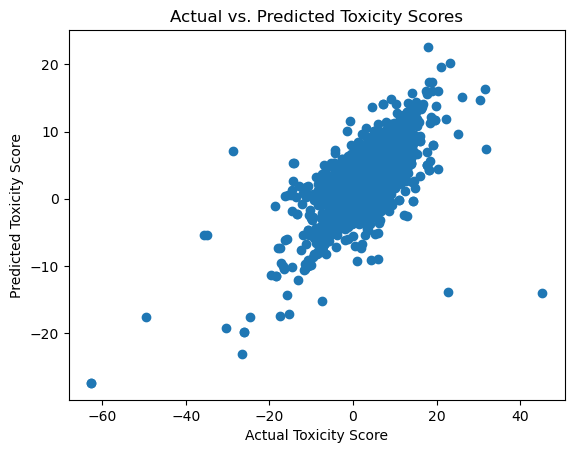

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Toxicity Score")
plt.ylabel("Predicted Toxicity Score")
plt.title("Actual vs. Predicted Toxicity Scores")
plt.show()


In [25]:
import joblib

# Assuming you have a trained model called "model"
model = ...

# Specify the file path to save the model
model_file = 'model_file.pkl'

# Save the model as a file
joblib.dump(model, model_file)


['model_file.pkl']

In [26]:
import joblib

# Specify the file path of the saved model
model_file = 'model_file.pkl'

# Load the model from the file
model = joblib.load(model_file)


In [27]:
import joblib

model_file = 'model_file.pkl'
joblib.dump(model, model_file)

print(f"Model saved as: {model_file}")


Model saved as: model_file.pkl
